[View in Colaboratory](https://colab.research.google.com/github/kmjohnson3/ML4MI_BootCamp/blob/master/FunctionFitting/FunctionFitter.ipynb)

# This is code to do very simple regression of functions 
Initially this is set to fit x1+x2 using a single 2 neuron hidden layer. This code makes a data set simply by evaulating the function. Some excersises:

1. Verify the number of network parameters match the expected. 
2. Change the function to a polynomial (a*x1^2+b*x2+c) or other function. Does it still fit well?
3. Change the network to improve the fit of your function in (2)
4. Add additional layers and evaluate the fit (2)
5. Try other more complex functions

In [1]:
# Load a bunch of libraries
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

#Import some libraries, some are used, some could be!
from keras.models import Input, Model
from keras.layers import Conv2D, Concatenate, MaxPooling2D
from keras.layers import UpSampling2D, Dropout, BatchNormalization
import keras
import numpy as np

Using TensorFlow backend.


In [2]:
'''
Generate random data of two inputs. 
'''
# Simple random data (2*X1 + X2)
x = np.random.randn(100000,1,2)

# Define as function so you only have to change once in the code
def target_function (x1,x2):
    return(2*x1 + x2 )

y = target_function (x[:,:,0],x[:,:,1])
y = np.expand_dims(y,axis=2)

print('Shape of output ' + str(y.shape))
print('Shape of input ' + str(x.shape))

Shape of output (100000, 1, 1)
Shape of input (100000, 1, 2)


In [3]:
# Make the two neuron network described in the powerpoint. Its two inputs, a 2 neuron hidden layer, and and one output layer
i = Input(shape=(1,2))
hidden_layer = keras.layers.Dense(2,activation='relu',use_bias=False)(i)
o = keras.layers.Dense(1,activation='linear',use_bias=False)(hidden_layer)
model = keras.Model(inputs=i, outputs=o)
model.summary()    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 2)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1, 2)              4         
_________________________________________________________________
dense_2 (Dense)              (None, 1, 1)              2         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Fit the  model
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x,y,epochs=10, batch_size=100)

Epoch 1/10
100000/100000 [==============================] - 1s 12us/step - loss: 2.2053
Epoch 2/10
100000/100000 [==============================] - 1s 11us/step - loss: 0.1344
Epoch 3/10
100000/100000 [==============================] - 1s 11us/step - loss: 7.3133e-04
Epoch 4/10
100000/100000 [==============================] - 1s 11us/step - loss: 8.3170e-08
Epoch 5/10
100000/100000 [==============================] - 1s 11us/step - loss: 1.5989e-11
Epoch 6/10
100000/100000 [==============================] - 1s 11us/step - loss: 5.5570e-12
Epoch 7/10
100000/100000 [==============================] - 1s 10us/step - loss: 2.0057e-12
Epoch 8/10
100000/100000 [==============================] - 1s 11us/step - loss: 6.4235e-13
Epoch 9/10
100000/100000 [==============================] - 1s 11us/step - loss: 2.4806e-13
Epoch 10/10
 28200/100000 [=======>......................] - ETA: 0s - loss: 1.0796e-13

100000/100000 [==============================] - 1s 11us/step - loss: 8.6936e-14


In [0]:
# This pulls out the weights from the model
weights = model.get_weights()

In [6]:
#Print the layers
print('Layer 1')
print(weights[0])
print('Layer 2')
print(weights[1])

Layer 1
[[ 1.8756357  -1.9474705 ]
 [ 0.93781793 -0.9737351 ]]
Layer 2
[[ 1.066305 ]
 [-1.0269732]]


In [7]:
# Now test with some random number
test = np.random.randn(1,1,2)
out = model.predict(test)
act = target_function(test[:,:,0],test[:,:,1])
print('A = ' + str(test[0,0,0]) + 'B = ' + str(test[0,0,1]) + ' Predict = ' + str(out[0,0,0]) + '  Actual = ' + str(act[0,0]) )


A = -0.7669159031828752B = 1.1299633404567775 Predict = -0.40386865  Actual = -0.40386846590897285


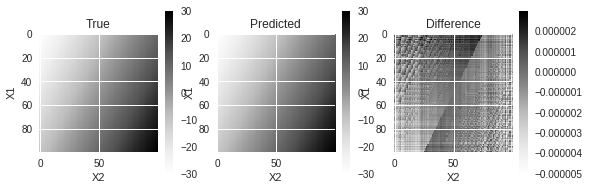

In [9]:
# Plot over a wider range (on a grid this time)
x1, x2 = np.meshgrid(np.linspace(-10,10,100),np.linspace(-10,10,100))
x1 = np.reshape(x1,(-1,1,1))
x2 = np.reshape(x2,(-1,1,1))
xtest = np.concatenate((x1,x2),axis=2)
ytest = target_function( xtest[:,:,0],xtest[:,:,1])
ytest = np.expand_dims(ytest,2)

# Do the inference ( prediction)
ypredict = model.predict(xtest)

#This imports the plotting tools. First line is to allow interactive on cloud
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(9,3))
plt.subplot(131)
plt.imshow(np.reshape(ytest,(100,100)))
plt.colorbar()
plt.ylabel('X1')
plt.xlabel('X2')
plt.title('True')
plt.subplot(132)
plt.imshow(np.reshape(ypredict,(100,100)))
plt.colorbar()
plt.ylabel('X1')
plt.xlabel('X2')
plt.title('Predicted')
plt.subplot(133)
plt.imshow(np.reshape(ypredict-ytest,(100,100)))
plt.colorbar()
plt.ylabel('X1')
plt.xlabel('X2')
plt.title('Difference')
plt.show()
